# NATURAL DISASTERS DATA ANALYSIS

In [31]:
import pandas as pd# Importing pandas library
import matplotlib.pyplot as plt # Importing matplotlib library
df = pd.read_csv("natural_disasters.csv") # importing the dataset

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Disaster_ID                 10009 non-null  int64  
 1   Disaster_Type               10009 non-null  str    
 2   Location                    10009 non-null  str    
 3   Magnitude                   10009 non-null  float64
 4   Date                        10007 non-null  float64
 5   Fatalities                  10008 non-null  float64
 6   Economic_Loss_in_Million_$  10009 non-null  int64  
 7   Buildings collapsed         0 non-null      float64
 8   probability                 0 non-null      float64
dtypes: float64(5), int64(2), str(2)
memory usage: 703.9 KB


In [2]:
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss_in_Million_$,Buildings collapsed,probability
0,1,Wildfire,Brazil,6.267393,1999.0,3.0,455,NaN,NaN
1,2,Hurricane,Indonesia,6.649358,2019.0,0.0,873,NaN,NaN
2,3,Tornado,China,9.724366,2011.0,23.0,1058,NaN,NaN
3,4,Flood,India,1.702505,2005.0,5.0,231,NaN,NaN
4,5,Flood,Brazil,7.917748,2010.0,28.0,966,NaN,NaN


In [3]:
df.shape # Shape of the Data Set

(10009, 9)

In [4]:
df.info() # Data types of the Data set

<class 'pandas.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Disaster_ID                 10009 non-null  int64  
 1   Disaster_Type               10009 non-null  str    
 2   Location                    10009 non-null  str    
 3   Magnitude                   10009 non-null  float64
 4   Date                        10007 non-null  float64
 5   Fatalities                  10008 non-null  float64
 6   Economic_Loss_in_Million_$  10009 non-null  int64  
 7   Buildings collapsed         0 non-null      float64
 8   probability                 0 non-null      float64
dtypes: float64(5), int64(2), str(2)
memory usage: 703.9 KB


In [5]:
df = df[["Disaster_ID","Disaster_Type","Location","Magnitude","Date",	"Fatalities","Economic_Loss_in_Million_$"]] 
# Selecting only the required columns for our analysis

In [6]:
df.head()

,Disaster_ID,Disaster_Type,Location,Magnitude,Date,Fatalities,Economic_Loss_in_Million_$
0,1,Wildfire,Brazil,6.267393,1999.0,3.0,455
1,2,Hurricane,Indonesia,6.649358,2019.0,0.0,873
2,3,Tornado,China,9.724366,2011.0,23.0,1058
3,4,Flood,India,1.702505,2005.0,5.0,231
4,5,Flood,Brazil,7.917748,2010.0,28.0,966


# Total Fatalities by Disaster Type

In [33]:
Fatalities_by_Disaster = df.groupby("Disaster_Type")["Fatalities"].sum().sort_values(ascending = False)

# Group by Disaster Type and sum all the fatalities

Text(0.5, 1.0, 'Total Fatalities by disaster Type')

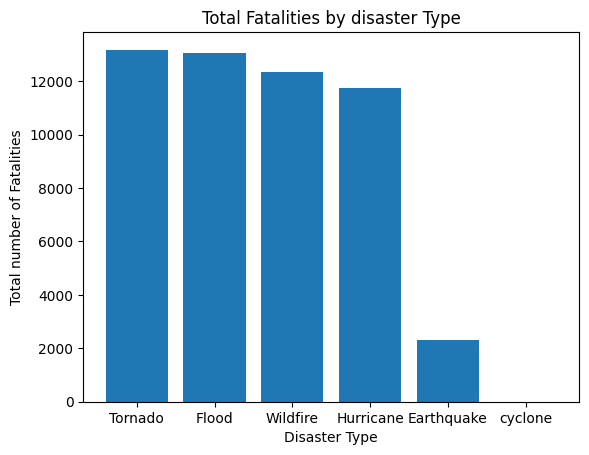

In [34]:
plt.bar(Fatalities_by_Disaster.index,Fatalities_by_Disaster.values)
plt.xlabel("Disaster Type")
plt.ylabel("Total number of Fatalities")

plt.title("Total Fatalities by disaster Type")

# Total Economic Loss by Disaster Type

In [8]:
Economy_loss_by_disaster = df.groupby("Disaster_Type")["Economic_Loss_in_Million_$"].sum().sort_values(ascending = False)

# Group by Disaster Type and sum all the Economy loss

Disaster_Type
Hurricane     1985214
Earthquake    1599850
Flood         1483237
Wildfire      1174649
Tornado        896496
cyclone          1082
Name: Economic_Loss_in_Million_$, dtype: int64

Text(0.5, 1.0, 'Total economic loss by disaster Type')

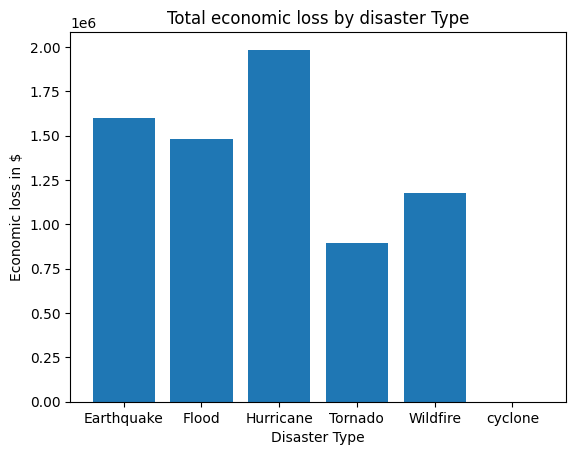

In [35]:
Economy_loss_by_disaster = df.groupby("Disaster_Type")["Economic_Loss_in_Million_$"].sum()

plt.bar(Economy_loss_by_disaster.index,Economy_loss_by_disaster.values)
plt.xlabel("Disaster Type")
plt.ylabel("Economic loss in $")

plt.title("Total economic loss by disaster Type")

# Total Economic loss by Country

In [13]:
country_groups_economy = df.groupby("Location")["Economic_Loss_in_Million_$"].sum()

country_groups_economy

Location
Brazil        960116
China        1472156
India        1136231
Indonesia     639368
Japan        1023769
USA          1908888
Name: Economic_Loss_in_Million_$, dtype: int64

Text(0.5, 1.0, 'Total economy loss by country')

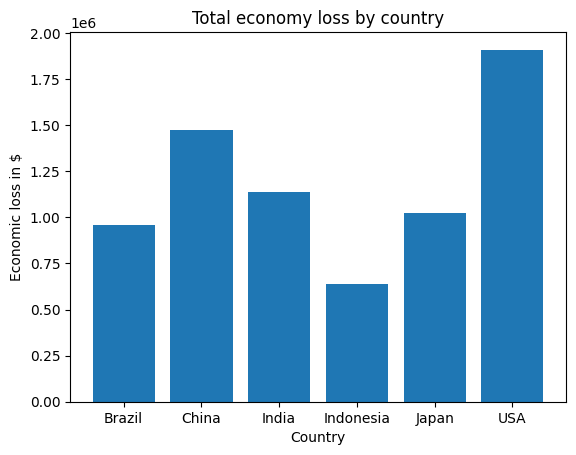

In [15]:
plt.bar(country_groups_economy.index,country_groups_economy.values)
plt.xlabel("Country")
plt.ylabel("Economic loss in $")

plt.title("Total economy loss by country")

# Total Fatalities by Country

In [14]:
country_groups_fatalities = df.groupby("Location")["Fatalities"].sum().sort_values(ascending=False)

country_groups_fatalities

Location
Indonesia    9996.0
India        9581.0
Brazil       9107.0
Japan        8331.0
China        7879.0
USA          7722.0
Name: Fatalities, dtype: float64

Text(0.5, 1.0, 'Total Fatalities by country')

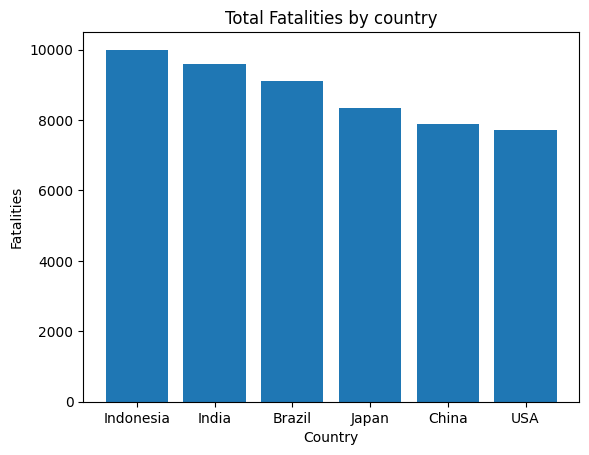

In [16]:
plt.bar(country_groups_fatalities.index,country_groups_fatalities.values)
plt.xlabel("Country")
plt.ylabel("Fatalities")

plt.title("Total Fatalities by country")

# Cleaning up the data for Model Prediction

In [17]:
Economy_Features = df[["Disaster_Type","Location","Magnitude","Economic_Loss_in_Million_$","Fatalities"]]

Economy_Features.shape

X1 = Economy_Features.dropna(subset=['Economic_Loss_in_Million_$', "Fatalities"])

X = X1[["Disaster_Type","Location","Magnitude","Fatalities"]]

y = X1["Economic_Loss_in_Million_$"]

In [18]:
y

0         455
1         873
2        1058
3         231
4         966
         ... 
10004    1082
10005    1082
10006    1082
10007    1082
10008    1082
Name: Economic_Loss_in_Million_$, Length: 10008, dtype: int64

In [19]:
X.shape

(10008, 4)

# One hot encoding the non-numerical columns

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

non_numerical_cols = ['Disaster_Type', 'Location']

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), non_numerical_cols)],
                               remainder='passthrough') # This specifies that all other columns should be kept

X_encoded = transformer.fit_transform(X)

# Splitting the Data for train and test

In [21]:
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [22]:
y_train.shape

(8006,)

In [23]:
X_train_encoded.shape

(8006, 13)

# Training the Model using Linear regression

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_encoded, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
y_train_hat = model.predict(X_train_encoded) # too easy --> vedi
y_train_hat.shape

y_train_hat[:5]

array([ 716.20160519, 1033.7626967 , -150.49891269,   -6.73385529,
        730.11626789])

In [26]:
y_train[:5]

8291     593
7866    1053
1095     125
4328     168
8965     380
Name: Economic_Loss_in_Million_$, dtype: int64

In [27]:
y_test_hat = model.predict(X_test_encoded) # WE PASS X_test_encoded, now we are in the test set
y_test_hat[:10]

array([1120.11756756, 1060.12075685, 1362.53798694, 1131.18737704,
        375.11059966,  159.0072141 ,  939.7521733 ,  990.56413209,
        968.97092935,  378.77828835])

In [28]:
y_test[:10]

3574     854
9056     738
568     1352
3160    1121
1558     450
3091     174
7835     677
3577     819
1794     788
7851     202
Name: Economic_Loss_in_Million_$, dtype: int64

# Visualization

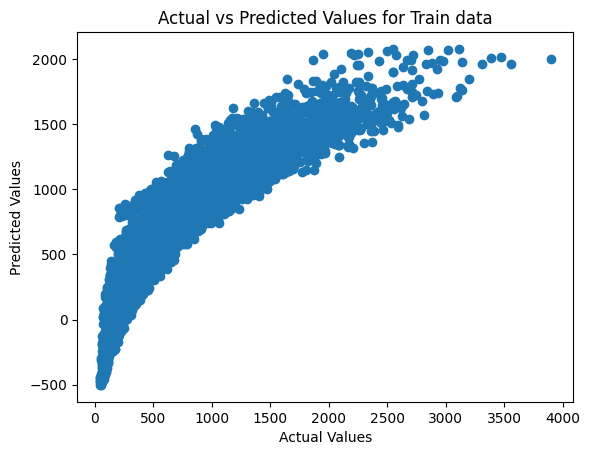

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_hat) 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Train data")

plt.show()

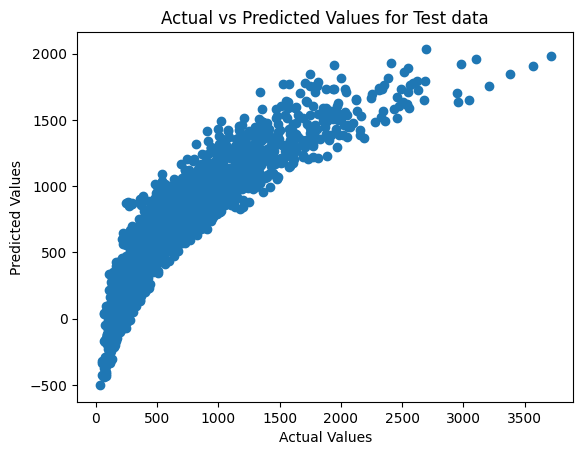

In [32]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_hat) 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values for Test data")

plt.show()

# EVALUATION

In [37]:
# Training set - just for curiosity

y_train_hat = model.predict(X_train_encoded)

from sklearn.metrics import mean_absolute_error, r2_score

# calculate MEA score
mae = mean_absolute_error(y_train, y_train_hat)

# calculate R2 score
r2 = r2_score(y_train, y_train_hat)

print(f"mean absolute error  = {mae}")
print(f"r-squared score  = {r2}")

mean absolute error  = 174.184326642795
r-squared score  = 0.7878816064954217


In [38]:
from sklearn.metrics import mean_absolute_error, r2_score

# calculate MEA score
mae = mean_absolute_error(y_test, y_test_hat)

# calculate R2 score
r2 = r2_score(y_test, y_test_hat)

print(f"mean absolute error  = {mae}")
print(f"r-squared score  = {r2}")

mean absolute error  = 177.55094316891515
r-squared score  = 0.7822983945807157
